In [14]:
import numpy as np
from scipy.optimize import minimize
from scipy.io import loadmat
from math import sqrt
import scipy.io
import matplotlib.pyplot as plt
import pickle



def learnRidgeRegression(X, y, lambd):
    # Inputs:
    # X = N x d
    # y = N x 1
    # lambd = ridge parameter (scalar)
    # Output:
    # w = d x 1
    wb = np.zeros(shape=(X.shape[1], 1))
    wb = np.dot(inv(np.dot(lambd, np.identity(X.shape[1])) + np.dot(X.T, X)), np.dot(X.T, y))
    # IMPLEMENT THIS METHOD
    return wb


def testOLERegression(w, Xtest, ytest):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # ytest = X x 1
    # Output:
    # mse
    mse = (1 / ytest.shape[0]) * ((ytest - np.dot(w.T, Xtest.T).T) ** 2).sum()
    # IMPLEMENT THIS METHOD
    return mse

Xtrain,ytrain,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding='latin1')   
# add intercept
x1 = np.ones((len(Xtrain),1))
x2 = np.ones((len(Xtest),1))

Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

w = learnOLERegression(Xtrain,ytrain)
w_i = learnOLERegression(Xtrain_i,ytrain)

rmse = testOLERegression(w,Xtrain,ytrain)
rmse_i = testOLERegression(w_i,Xtrain_i,ytrain)
print('RMSE without intercept on train data - %.2f'%rmse)
print('RMSE with intercept on train data - %.2f'%rmse_i)

rmse = testOLERegression(w,Xtest,ytest)
rmse_i = testOLERegression(w_i,Xtest_i,ytest)
print('RMSE without intercept on test data - %.2f'%rmse)
print('RMSE with intercept on test data - %.2f'%rmse_i)

RMSE without intercept on train data - 19099.45
RMSE with intercept on train data - 2187.16
RMSE without intercept on test data - 106775.36
RMSE with intercept on test data - 3707.84


In [29]:
a = np.random.randn(3, 3)
B = np.linalg.pinv(a)
print(a)
print(B)
print(np.dot(B, a))
print(np.dot(a,np.dot(B, a)))
np.allclose(a, np.dot(a, np.dot(B, a)))

[[ 0.11844328  0.91214989 -1.00682214]
 [-1.5133838  -1.63678857  0.15032005]
 [ 0.49792401  1.60358556 -0.87729192]]
[[ 1.92229098 -1.31001873 -2.43057888]
 [-2.01550426  0.6393396   2.42263702]
 [-2.59306924  0.42511046  1.90889956]]
[[ 1.00000000e+00  1.57786494e-15 -1.40769472e-15]
 [-1.28998060e-15  1.00000000e+00  1.14443882e-15]
 [-1.20718079e-15 -3.01848508e-16  1.00000000e+00]]
[[ 0.11844328  0.91214989 -1.00682214]
 [-1.5133838  -1.63678857  0.15032005]
 [ 0.49792401  1.60358556 -0.87729192]]


True

[3340091.05028525]
[-3.58713516e+04 -1.63437861e+01 -8.34362652e-01 -3.62873809e+02
 -2.78662515e+02 -1.64103898e+01 -2.80504622e+01  2.89526143e+02
 -2.29586338e+02 -3.60372445e+02 -2.96735526e+02 -3.30244820e+01
  7.70029930e+00 -2.19068864e+01  7.44032215e+01  5.62819876e+01
  3.39501852e+01 -6.47930474e+01  1.43947645e+02 -1.85691436e+02
 -1.69015095e+02 -5.05167216e+01 -1.01782182e+02  8.66458414e+01
  1.46648577e+02 -9.77034994e+01  1.06762938e+02 -1.19743677e+01
 -4.38106703e+01 -1.43817441e+02 -6.77571729e+01 -1.58678419e+02
 -1.59571017e+02 -6.23639157e+00 -1.49707294e+02 -6.08166639e+01
 -1.08860759e+02 -5.37779312e+01  8.34447847e+01  6.58873122e+01
  5.77286082e+00 -2.17799822e+01  4.62929710e+01 -1.34263056e+02
  5.70160856e+01  4.80998223e+01 -5.99213316e+00  1.36530607e+01
  6.96966268e-01 -8.73166683e+01  6.39886065e+01 -1.10377787e+02
  1.05546089e+02  2.06398709e+02 -1.13683853e+01 -9.44420268e+01
  3.36294911e+01  1.83687520e+02 -3.93418877e+01  3.48245704e+01
 -7.69

[331750.23174258]
[  0.2657202    1.36751757   6.31169411  19.28056843   3.49112408
  32.4589529   31.84311651  -3.61128586  24.12294378  22.4761
  24.85957152  -6.9424122   15.63404515  -3.72314588  33.01228296
  44.93720224  28.49630935  25.07853594 -38.95416855 -63.42054652
 -14.51502296 -35.72618196 -15.27653206  -3.66276882  -9.79317698
  53.79802713 -54.57135907 -42.76923026 -52.98175201 -11.38849548
 -24.40297144  36.1542254   46.87689679 -11.22085849  32.11727862
   8.96458076 -20.64944038 -34.19473562  -6.53102172   5.59737519
 -11.20830181   6.81996517 -33.68394507 -36.37509944  -7.61670751
 -17.95145212  42.87499259 -49.80082625 -46.91050119 -59.22271535
  32.85546185   2.96174326  27.310395    -0.89991032  -7.87189086
 -24.66385777  37.09635722 -15.38364374   1.92471352 -25.53411221
  35.39308679  41.97207937 -16.7533595  -38.96804859 -72.41012129]
[325063.14630191]
[  0.11210917  -1.26470068  22.27401364  -2.04404455  -3.15382723
  19.12293499  27.02122749 -10.89609652  15

[327774.53540995]
[ -2.43690966  -2.82599821  -1.19952426   0.06506456   0.34107489
  -0.62322858  -1.52503325  -5.9401716   -0.23482069   0.32096338
   3.96566816   2.73025429   3.47784512   3.06569147  12.09989119
   6.42897672  -6.66425083  -3.82045189   2.35335154   1.20021953
  -1.2600344   -5.6815978   -3.29914185  -2.31041409  -2.23010331
  -6.59960047  -4.71872503   0.88640245   0.33157905 -12.56319984
  -3.14532828   2.32703074   3.06185612   6.96732344  -4.58610912
  -0.61534908  -5.13338669 -11.1590668    6.58110666   0.41300747
  13.46160908  -4.68502098  -5.83696642  -0.48627631   9.50304133
   6.07552285  -5.88248897   4.45605626   1.24559252   2.47785317
   6.0742386   -4.06437599  15.0445832   19.09267041  15.25378037
   4.73232576   2.4400955    0.57979388  10.68693641   9.33294369
   4.30596996  -1.78000322  12.3417993    7.15180772   1.85142024]
[327255.87655013]
[ 6.41823276e+02  1.99377708e+00  2.17404412e+00 -1.58868340e+00
  2.76672450e+00 -3.97937522e+00 -3.3397

[337280.40505559]
[ 0.70342425  0.74982202  0.43036188 -0.20007354  0.51840521  1.77426676
  1.1371346  -0.96987587  0.97636339 -0.12283649  1.68358371 -1.0252004
  3.29088311  2.5315175  -0.40940699 -0.3409217   1.45414749 -1.17846988
 -0.50572068  2.46803481 -1.35766218  0.72685958  0.02169311  0.1685139
 -0.13335907 -1.69696622 -2.84760239  0.08767989  0.94293727 -0.38519521
 -0.50226819 -0.73960546  0.31371883  0.55561884 -1.0311382   0.03249463
 -0.12843816 -0.31857989  0.86073016 -1.89142003  0.37996407  1.89691852
  1.07892288  4.14896737  2.5697336  -0.06744044 -1.82201339 -0.86671565
  1.49123799  3.72545093 -2.34533565 -1.97387887  2.70416536  3.48708224
  2.83248234 -0.42937076 -0.92697543 -4.94866034  0.68410056 -0.61906653
  0.28006011 -3.27617132  3.91739724  2.36253913  1.59753967]
[337183.01597532]
[-1.56023072e+02  8.79790089e-01  1.69283402e-01 -1.42682610e+00
 -9.90628770e-01  8.59896808e-02 -1.55265870e-01  9.95900204e-01
 -2.12790851e+00 -2.35082926e+00 -1.95432757

[3096741.44703838]
[ 3.21164164e+04  2.78160681e+02  3.41412808e+02  3.93505101e+02
  3.60787425e+02  3.27984187e+02  4.08672845e+02 -3.89172755e+02
  5.29883509e+02  3.60191477e+02  5.04313969e+02 -2.87867906e+02
 -8.05483250e+01  4.15577379e+00 -7.87965841e+01  5.07341766e+01
 -3.35732781e+00  2.10241266e+02 -8.93271525e+01  3.37818563e+02
 -6.49072603e+01 -1.48677222e+02 -1.25747956e+02 -3.64180555e+02
 -3.77728035e+02  8.52224790e+01 -3.21482133e+02 -2.34135512e+02
 -1.04882433e+02  1.10982616e+02 -1.60345371e+01  5.12239660e+01
  1.10441814e+02 -1.02913102e+02  1.58283347e+02  1.27920354e+00
  1.45773905e+02 -5.38215147e+01 -2.05346612e+02 -1.97631880e+02
 -6.27999322e+01  8.69955693e+00 -5.75019410e+01  1.73028027e+02
 -1.80607947e+02 -1.69282442e+02 -4.22366264e+01 -6.72167558e+01
 -4.37968952e+01  1.49169275e+02 -2.49451853e+01 -9.81716423e+00
 -3.57174727e+00 -2.58531924e+02  1.48258379e+01  6.11347667e+00
  7.27731144e+01 -2.88091564e+02  4.71568026e+01 -1.57865314e+02
 -4.61

[361646.594144]
[ 16.90951913  -2.50570324   2.85610742   0.27611686   2.96817795
   1.68177232   2.8783304   -9.24410967   4.80345036   3.55328977
  -0.12466319   3.55999723  -5.70644578  -2.16789304  21.24996681
  16.44223709 -12.80795551   5.51786607   4.26627412   4.87163137
   2.16340879  -0.6465012   -3.94775347  -1.06758031   0.48302257
 -10.56419876   3.70551259   4.74915363   2.76818893  -6.35040098
   2.75617091   7.05286911   6.41438081   8.05215394  -1.22762347
  -0.2335413   -0.93731356  -8.25968213  16.6550932   12.1184897
  17.37699577  -2.3544432   -3.09708736   1.09362896   9.95030507
  11.64838958 -10.3523179   13.44330897   3.98761254   2.86335721
  18.84775572  -8.94866019  24.12140431  22.91792554  20.93595531
   0.32258035  15.46519662  16.75276952  19.11907139   9.2391211
   2.60961207  -2.4070652   12.89998173  13.86191355   6.81156915]
[360952.89919089]
[  6.89746789   0.47662537  -0.67534998   0.89010451   1.77492836
  -1.44662149  -1.97941322  -4.07718336  -1

[368734.07668507]
[ 5.81961002 -0.55007368 -0.20393189 -0.4918147  -0.23057057  0.28804678
  0.17895274 -0.09558588 -0.00795684 -0.54544563 -0.01826635 -0.0071444
  1.16728089  1.59788935 -0.64251638 -0.37593438 -0.27025023 -0.43818869
  0.60667275  2.2109519  -0.27205239  1.61274329  1.11625951  1.48201089
  1.30955366 -0.73793578  0.39488295  1.09864137  1.6793024   0.62096626
  0.05055589  0.04693509  0.09057344  0.8918749  -0.58863211 -0.26867164
  0.54123316  1.79425721  1.03966645 -0.16495954  0.01840282  1.12904488
  1.90078607  2.57473699  1.64461743  0.65678173 -0.33330138  0.04925352
  1.65933586  2.64133425 -0.92515766 -1.2313001   0.73712558  0.9966196
  1.45718491 -0.27515666 -0.30173952 -1.07252316  0.55138677  0.1263816
 -0.4677564  -1.35438663  1.31158056  1.42970142  1.99217157]
[368727.03330751]
[ 3.15732311e+01  1.22966648e-01  5.91955240e-02 -1.58132962e-01
  1.47161324e-02  3.89504014e-01  3.72224829e-01  1.84309143e-03
 -8.59359190e-02 -4.20829071e-01 -6.86308758e

[689397.47197417]
[ 2.13643877e+03 -1.40978882e+02 -4.94600502e+01 -4.50727607e+02
 -3.38019550e+02 -1.37210327e+02 -1.10255719e+02  3.19141462e+02
 -3.45626900e+02 -4.65362704e+02 -3.54213819e+02  2.92940136e+01
 -1.33255416e+02 -1.05769466e+02 -1.89575589e+01  3.29085181e+00
  8.82080820e+00 -8.61693999e+01 -1.45334429e-01 -1.38152193e+02
 -2.89798158e+01  4.06252323e+01 -4.04702426e+01  1.29638769e+02
  1.52211816e+02  4.66846215e+01  3.30226147e+01 -1.52886503e+01
 -3.65064919e+01 -1.28536803e+01 -2.86420804e+01  3.38579018e+00
  3.09081221e+01 -4.58074906e+01  3.71197225e-01 -2.24194768e+01
  1.42067986e+01 -7.15111309e+01  1.00603116e+02  9.70290998e+01
  7.09104190e+01 -2.12762681e+01 -6.72711118e+00 -1.39643255e+02
  9.83738525e+01  1.20646940e+02 -1.29006354e+00  5.36196957e+01
 -3.83832428e+00 -6.63103334e+01  3.04686699e+00 -4.78636243e+01
  2.19813115e+01  1.78022801e+01 -1.54344936e+01 -5.64357702e+01
  1.51029748e+01  7.81853016e+01  6.73342258e+00  5.34894956e+01
 -2.374

   6.26085273  -0.39032665  -1.62598596  -6.55915135  18.42696931]
[395648.70814997]
[  0.19046887   0.09979136  -8.1797895   22.42545051   5.33445747
  22.96105558  17.36470277   2.66801113  16.56757777  27.82147335
  13.8690851   -8.44279058   5.79655921 -10.76070857  26.89107116
  35.530276    30.55075407  28.85092401 -31.2085596  -50.43500311
 -14.63425953 -38.13712444 -20.65391882 -12.84523888 -20.50185829
  53.50491937 -52.52062111 -39.62691251 -49.6264069  -10.85524546
 -17.02341821  31.41584741  38.58177104  -8.45405926  27.85655542
   7.92111425 -18.18562326 -30.78268697  -1.56451974  12.71150634
  -9.39365933   4.93106258 -30.86465344 -33.20792119  -6.81143553
 -11.97694969  32.90713459 -34.40553173 -37.47780694 -55.13392589
  27.82521733   0.66137912  22.77982748   1.17701322  -2.66027331
 -28.36242463  35.8544496    0.33095673   9.24699551 -30.48733381
  23.87271031  30.89932747 -10.90648758 -24.93695459 -57.28220984]
[388641.34119885]
[  0.06618075  -1.07719192  13.5313767

[394425.31339234]
[ -0.1436686   -5.25903002 -17.87563766  -1.25514683  -6.05741774
 -10.84385443 -18.13646093  11.6435647  -12.36548351  -5.01072664
  -1.51296048  -0.40875957  12.10756295   6.99150354 -15.06748987
 -15.76637113  14.90427995  -0.89785583   9.07992807  17.4255798
  -3.83432275  -3.06478233   0.3318817   -6.12589341  -9.23211742
   0.31506606  -5.19581185   1.95348615   5.85389067  -0.2077391
   1.95318385  -4.69273047  -4.58998595  -5.88256449   0.41588149
   5.60878023   3.5317775    4.49045056  -4.09690088  -4.47392261
 -13.78182974   7.7565217    8.03042152  12.50329615   5.31511537
   1.42091778  -6.71341168   6.17083595  10.7655916   11.89551366
 -18.45680101  -4.15352223  -7.29037649   2.35561204   6.09169456
  -5.74518383 -11.25282026  -6.20475306   3.23239288 -12.70135842
 -15.59495425 -20.99813003  14.56750972  16.24595197  17.19719857]
[393572.37873098]
[-5.36603331e-02 -3.41614826e+00 -4.47691273e+00 -1.32464784e+00
 -4.21877021e+00 -1.49589942e+00 -3.552878

[399458.46833611]
[ 0.05149122  0.48247524 -0.78502107  0.56477831  0.66918769 -0.97036668
 -1.43769519 -1.49133088 -1.42956857  0.30766367  1.18116769 -0.37668101
  0.14007949  0.4671779  -0.03048706 -2.75503599 -2.6545457  -5.81244755
 -0.03726923 -1.66694338 -1.54435075 -3.82646699 -1.87461751 -2.10576028
 -2.27879747 -0.60540614 -3.5294839  -1.27933537 -1.18434725 -6.92034459
 -2.94989742 -2.87746805 -2.89091126  3.95341912 -5.23193898 -2.70295985
 -3.84738357 -4.61609503 -1.75565564 -4.1411284   6.06848492 -5.54335622
 -3.96967005 -2.82565098  1.19422594 -0.27485024 -0.2869784  -1.15696249
 -0.96114782 -0.30000455 -2.51215821  2.0891734  -0.63083129  2.83424297
  0.80850067  5.16977371 -4.80465013 -3.66839117 -0.98373693  5.66011427
  2.87374447  1.85791607  0.91189673 -1.9035804  -1.59336828]
[399835.11664675]
[  6.70891102  -3.70487304   2.11752584  -1.24191453   0.06272798
   2.07451176   3.0593549   -3.71901992   5.11660331   1.02813882
  -1.20966363   4.21195698  -1.178948   

[405322.77473817]
[ 1.88386921  0.83985373 -0.03725909  0.08864881  0.67661159 -0.74599053
 -0.95693705 -0.35386479 -0.41070779  0.2729132  -0.72000954  0.19525956
 -0.69599793 -1.10498175 -0.14767141 -0.91308708  0.34899928 -0.84488457
 -0.88164058 -0.7931132   1.07346553 -0.16590155 -0.86888351 -1.53193856
 -1.15469833 -2.08105775 -0.1056128   0.18545778 -0.14518651 -0.03731804
  1.32651867 -1.08304171 -0.8505419  -0.69409905 -0.16287004  0.71959747
  0.1754578  -1.51570361 -0.36053409 -0.6714776   1.09407797 -0.72736528
 -1.4345534  -0.62650018 -0.38903205  0.04346264 -2.52257718  1.51348632
 -0.03929941 -0.17300764 -0.8954751   0.52989631 -0.06853898  0.70798889
 -0.56811817  0.78013764 -0.93897377 -0.60390508 -0.7064232   0.31204294
  0.14700884 -0.59782182  0.74654118 -0.15776251 -0.62736633]
[405747.98296568]
[-4.55205857e+02  5.86465939e-01  4.17848091e-01  8.01048702e-01
  5.05145002e-01  2.31028890e+00  1.66258373e+00 -5.99288051e-01
  2.28129797e+00  1.72852650e+00  8.981926

[411021.25557292]
[ 8.86606154e+01  3.18228470e-01 -4.75218474e-01 -6.19099852e-02
  1.31066255e-01 -4.92607020e-01 -6.86518793e-01  4.21138092e-01
 -8.23233542e-01  2.38199243e-02 -3.45809272e-01 -1.27586862e-01
 -2.93039830e-01 -5.65329377e-01 -1.54529384e+00 -1.71495733e+00
  6.44488207e-01 -1.44591199e+00 -1.19309053e+00 -9.44523937e-01
  1.08865646e-01 -6.98758185e-02 -7.71515091e-02 -1.82804593e-01
 -4.39264199e-01  9.11928087e-01 -1.14935211e+00 -4.49704127e-01
 -5.38715515e-01 -1.64173218e-01 -3.44565745e-01 -8.62620693e-01
 -6.85659635e-01  1.18187452e-01 -6.67510347e-01 -4.89205985e-01
 -4.77136263e-01 -5.18605788e-01 -1.03579347e+00 -1.15165815e+00
  2.75211591e-01 -6.48507055e-01 -8.14562730e-01 -5.16062550e-01
 -6.04912331e-01 -8.47359806e-01  3.81972656e-01 -1.05366104e+00
 -6.50060116e-01 -5.26847471e-01 -1.87431453e+00  1.34706192e+00
 -1.89919690e+00 -1.36419406e+00 -1.50098918e+00  8.90104832e-01
 -1.82592806e+00 -2.01049391e+00 -1.51709846e+00  2.49159874e-01
  8.989

[416428.11066358]
[-0.01520364  0.34571043 -0.22561913  0.09442437  0.25757306 -0.0104219
 -0.19938642  0.24182721 -0.13381194  0.39432369 -0.40142542 -0.06515938
 -0.2100625  -0.49138022 -0.38994532 -0.40979045  0.58783481 -0.11353598
 -0.53377237 -0.4060971   0.06494133  0.26457125 -0.08514038  0.00317307
 -0.10126338  0.29598655 -0.24186284 -0.01753733 -0.20719649  0.35706539
  0.14452301 -0.40630806 -0.35220048 -0.0496785  -0.20529575 -0.15105626
 -0.16348988 -0.01244973 -0.00698084  0.06226415 -0.17042591  0.19459497
 -0.08852292  0.07583749 -0.39983883 -0.40176504  0.00257435 -0.31678118
 -0.22645568 -0.34425584 -0.46576771  0.39043613 -0.51422685 -0.34027982
 -0.57532505 -0.11013522 -0.26160787 -0.29149749 -0.48619229 -0.38239113
  0.30396355  0.13043062 -0.40606749 -0.43196457 -0.46054386]
[416431.02757035]
[-2.96588426 -0.72091736 -0.039501    0.03872507 -0.11471861  0.45632186
  0.52717841 -0.34287368  0.53339649  0.19185906  0.22189972  0.2882707
  0.33519879  0.64263904  1.

[421608.10880755]
[-0.0557481   0.2471088  -0.22748733  0.07902661  0.23044725 -0.04505559
 -0.21786522  0.1982455  -0.07029939  0.36829319 -0.43423664  0.01459941
 -0.23912363 -0.49201414 -0.14025603 -0.13691391  0.55254083  0.20446201
 -0.39542707 -0.18377802  0.19085608  0.32614118 -0.09294972 -0.05177906
 -0.10853592  0.05850621 -0.03991397  0.10096958 -0.0884192   0.52042873
  0.37115795 -0.18528263 -0.13944493 -0.19829173  0.0652038   0.07326846
  0.05137149  0.02777228  0.22227922  0.33464635 -0.22121517  0.36776736
  0.00817892  0.19403565 -0.27159763 -0.16866263 -0.26984506  0.06986401
 -0.05937655 -0.2241972  -0.16893171  0.13449225 -0.15236133 -0.09599454
 -0.27201028 -0.31813857  0.09449201  0.09299192 -0.14568884 -0.52129674
  0.07886843 -0.12348275 -0.12128116 -0.04409885 -0.19810571]
[421607.42189218]
[ 1.19913518e+01 -9.52524535e-02 -4.39056942e-02  1.37732117e-01
  1.74058905e-01  2.40082844e-02  5.03342960e-02 -2.62836544e-01
  7.10567909e-02  2.25773311e-01 -5.492339

[426562.13613116]
[-1.26804989e+00 -4.94803362e-03  8.56760415e-03  2.93779997e-02
  8.51693135e-04  3.70545811e-02  3.83691884e-02 -7.78437539e-03
  2.61472091e-02 -4.53119569e-03 -1.21839446e-02 -4.92104786e-02
 -7.95370023e-03  2.59705566e-03 -1.08007236e-02  1.09282311e-02
  1.53991755e-02  6.42376401e-03 -2.37683356e-02 -1.40317045e-03
 -2.35064487e-02 -3.66084707e-02 -2.85141656e-02 -1.44130736e-02
 -1.05572349e-02 -7.20541465e-03 -5.89055418e-02 -3.78532659e-02
 -1.60130055e-02 -1.15668644e-02 -9.18187019e-03  5.09645244e-03
  1.66452118e-02  1.01091630e-02  8.75365472e-03  3.95265634e-03
  1.66306923e-02  6.36959381e-03 -8.35850312e-03 -4.55976674e-02
  2.80081564e-02 -9.57276952e-03 -1.98749283e-03 -1.63113802e-02
  1.77436764e-02 -6.77899749e-03 -1.57723665e-02 -3.13559770e-02
  4.46257066e-03  4.93499793e-03 -1.56265684e-02 -4.34751337e-02
  4.27293584e-02  1.57713602e-02  1.31490555e-02 -2.35394810e-02
  1.64247011e-02 -4.58300913e-02 -3.67188379e-03 -2.36351626e-02
 -2.188

 -7.28795058e-03]
[431312.34557283]
[ 1.35051573e+00 -1.77493346e-02 -3.86669414e-02  5.49240251e-02
  2.82893910e-02  3.16052542e-02  1.49224014e-02 -1.00320679e-02
  2.32965885e-02  5.37568070e-02 -2.53655975e-04 -1.83984250e-02
  3.44199148e-02  3.75707035e-02 -5.27931611e-02 -2.87930895e-02
  3.14277044e-02 -1.18032971e-02 -4.33419857e-02  2.30288831e-02
 -1.25611308e-02  3.77993764e-02  3.73558778e-02  5.67834633e-02
  3.31420612e-02  5.04679329e-02 -5.05904182e-02  3.65278691e-03
  1.93967467e-02  3.08096998e-02 -1.36351966e-02  1.50020657e-02
  1.86192365e-02  5.15130696e-02 -1.38605720e-02 -1.99471964e-02
  2.65256969e-03  7.73490830e-02  1.32982041e-02 -2.68217281e-02
 -3.72250367e-03  3.57377396e-02  4.58589695e-02  6.21201399e-02
  3.23085663e-02 -1.81697117e-02  4.07428942e-02 -7.59942096e-02
  2.13437328e-02  3.81876230e-02 -6.00026726e-02 -1.74891009e-02
 -9.10132048e-03 -1.61237827e-02  4.43033811e-03 -2.34203059e-02
 -1.60806416e-02 -8.33602831e-02 -1.89606242e-02 -3.09

[3161973.79814399]
[-3.46463517e+04 -1.98205757e+01 -1.86632852e+00 -3.65152113e+02
 -2.80027626e+02 -1.97639343e+01 -3.01617096e+01  2.90999002e+02
 -2.32777461e+02 -3.63202274e+02 -2.98039440e+02 -3.04854963e+01
  3.69717935e+00 -2.40717706e+01  7.19283589e+01  5.51068113e+01
  3.36727753e+01 -6.49456550e+01  1.39837621e+02 -1.83621377e+02
 -1.63969592e+02 -4.70496120e+01 -9.92725797e+01  8.85577518e+01
  1.47353583e+02 -9.25209170e+01  1.04918092e+02 -1.15480820e+01
 -4.30413216e+01 -1.39064993e+02 -6.59632320e+01 -1.52924750e+02
 -1.52903042e+02 -6.97675170e+00 -1.44339583e+02 -5.90461427e+01
 -1.04363865e+02 -5.38137199e+01  8.45255036e+01  6.74187292e+01
  8.40102152e+00 -2.12304818e+01  4.51174179e+01 -1.33897963e+02
  5.88766596e+01  5.09643070e+01 -5.30795714e+00  1.54707893e+01
  1.08343639e+00 -8.61045675e+01  6.25572762e+01 -1.07828856e+02
  1.03385022e+02  2.00853898e+02 -1.09664557e+01 -9.26823650e+01
  3.35642018e+01  1.80817274e+02 -3.73254150e+01  3.59562164e+01
 -7.46

[1035332.80531612]
[-1.55349639e+04  5.10441199e+00  4.09058285e+01 -2.34727552e+02
 -1.69872805e+02  1.24775997e+01  2.28590040e+01  1.68662717e+02
 -1.18811757e+02 -2.41150199e+02 -1.62154568e+02 -5.40137665e+01
 -3.08628855e+01 -3.02978471e+01  2.74161761e+01  3.96302498e+01
  1.98974066e+01 -2.37938527e+01  7.04236000e+01 -8.22039661e+01
 -1.10460054e+02 -4.09825439e+01 -8.23289355e+01  2.25592401e+01
  5.94999963e+01 -3.64274277e+01  2.31022610e+01 -4.17763520e+01
 -4.50414760e+01 -6.81640409e+01 -4.59074137e+01 -8.34110820e+01
 -7.03678477e+01 -2.61654567e+01 -6.33244684e+01 -3.86379804e+01
 -3.80507144e+01 -5.05245852e+01  3.67528155e+01  2.65638909e+01
  8.06490787e+00 -1.49596050e+01  1.81323081e+01 -7.66363913e+01
  2.52620869e+01  2.57401664e+01 -9.66874385e+00  8.49826190e+00
 -5.63574240e+00 -3.89572971e+01  3.31277568e+01 -7.26641586e+01
  6.35758168e+01  8.43320533e+01 -7.34522875e+00 -6.17991999e+01
  3.14830842e+01  7.74253962e+01 -1.51369679e+01  9.02697848e+00
 -5.45

[694031.5722571]
[ 2.19487945e+03 -1.40581200e+02 -4.90913549e+01 -4.49771774e+02
 -3.37200639e+02 -1.36818255e+02 -1.09844652e+02  3.19043421e+02
 -3.44890257e+02 -4.64412751e+02 -3.53367168e+02  2.97116333e+01
 -1.32902763e+02 -1.05369990e+02 -1.87203194e+01  3.55745939e+00
  9.13613628e+00 -8.57038831e+01 -1.38769069e-02 -1.37489874e+02
 -2.83404669e+01  4.10698650e+01 -3.99412471e+01  1.29860727e+02
  1.52337187e+02  4.72136708e+01  3.32126568e+01 -1.49067630e+01
 -3.60721635e+01 -1.22580596e+01 -2.81678742e+01  4.00232717e+00
  3.15267007e+01 -4.54286287e+01  9.75931914e-01 -2.19571801e+01
  1.47470553e+01 -7.10604403e+01  1.00826465e+02  9.72813816e+01
  7.12713422e+01 -2.08806335e+01 -6.43993002e+00 -1.39065563e+02
  9.86431071e+01  1.20930750e+02 -9.09512654e-01  5.39599630e+01
 -3.47608156e+00 -6.58060853e+01  3.30074623e+00 -4.73106321e+01
  2.21669444e+01  1.78266546e+01 -1.50587667e+01 -5.59097155e+01
  1.54061898e+01  7.82470132e+01  7.15520003e+00  5.38038174e+01
 -2.3252

[3340111.52528525]
[-3.58707216e+04 -1.57137861e+01 -2.04362652e-01 -3.62243809e+02
 -2.78032515e+02 -1.57803898e+01 -2.74204622e+01  2.90156143e+02
 -2.28956338e+02 -3.59742445e+02 -2.96105526e+02 -3.23944820e+01
  8.33029930e+00 -2.12768864e+01  7.50332215e+01  5.69119876e+01
  3.45801852e+01 -6.41630474e+01  1.44577645e+02 -1.85061436e+02
 -1.68385095e+02 -4.98867216e+01 -1.01152182e+02  8.72758414e+01
  1.47278577e+02 -9.70734994e+01  1.07392938e+02 -1.13443677e+01
 -4.31806703e+01 -1.43187441e+02 -6.71271729e+01 -1.58048419e+02
 -1.58941017e+02 -5.60639157e+00 -1.49077294e+02 -6.01866639e+01
 -1.08230759e+02 -5.31479312e+01  8.40747847e+01  6.65173122e+01
  6.40286082e+00 -2.11499822e+01  4.69229710e+01 -1.33633056e+02
  5.76460856e+01  4.87298223e+01 -5.36213316e+00  1.42830607e+01
  1.32696627e+00 -8.66866683e+01  6.46186065e+01 -1.09747787e+02
  1.06176089e+02  2.07028709e+02 -1.07383853e+01 -9.38120268e+01
  3.42594911e+01  1.84317520e+02 -3.87118877e+01  3.54545704e+01
 -7.62

[1152987.64976382]
[-1.50445715e+04 -8.39644050e+01 -2.68981201e+01 -4.10021155e+02
 -3.10309866e+02 -8.19368371e+01 -7.24544886e+01  3.05961610e+02
 -2.92290488e+02 -4.16896754e+02 -3.27337617e+02  1.62661579e+00
 -6.88759233e+01 -6.72247959e+01  2.37868989e+01  2.77655420e+01
  2.07044108e+01 -7.58905379e+01  6.55148072e+01 -1.58968679e+02
 -9.17138690e+01 -8.27254731e-02 -6.76108469e+01  1.10601949e+02
  1.50070162e+02 -1.80914904e+01  6.68485236e+01 -1.32455089e+01
 -3.92404374e+01 -7.15059110e+01 -4.57617986e+01 -6.93424084e+01
 -5.46914367e+01 -2.73410479e+01 -6.69346801e+01 -3.92215369e+01
 -4.09034526e+01 -6.28921309e+01  9.32708838e+01  8.33804119e+01
  4.19298763e+01 -2.09540337e+01  1.77737706e+01 -1.36539735e+02
  8.01078653e+01  8.82606668e+01 -2.87937522e+00  3.60290662e+01
 -1.25452397e+00 -7.52072447e+01  3.11152840e+01 -7.55336111e+01
  6.02551354e+01  1.03555502e+02 -1.30546728e+01 -7.30201998e+01
  2.39876200e+01  1.26318549e+02 -1.35727721e+01  4.55325687e+01
 -4.72

 -9.27979396e+01]
[695158.77402273]
[ 2.20909473e+03 -1.40484647e+02 -4.90018532e+01 -4.49539453e+02
 -3.37001623e+02 -1.36723067e+02 -1.09744844e+02  3.19019390e+02
 -3.44711254e+02 -4.64181861e+02 -3.53161405e+02  2.98130355e+01
 -1.32817163e+02 -1.05273002e+02 -1.86627939e+01  3.62212853e+00
  9.21265647e+00 -8.55908300e+01  1.79175429e-02 -1.37328950e+02
 -2.81851299e+01  4.11778380e+01 -3.98127531e+01  1.29914535e+02
  1.52367501e+02  4.73421778e+01  3.32587017e+01 -1.48140525e+01
 -3.59666969e+01 -1.21133593e+01 -2.80527075e+01  4.15211520e+00
  3.16769853e+01 -4.53366540e+01  1.12284909e+00 -2.18449104e+01
  1.48782884e+01 -7.09509936e+01  1.00880611e+02  9.73425660e+01
  7.13589532e+01 -2.07845790e+01 -6.37025644e+00 -1.38925223e+02
  9.87084200e+01  1.20999604e+02 -8.17127263e-01  5.40425495e+01
 -3.38814956e+00 -6.56836110e+01  3.36231925e+00 -4.71763011e+01
  2.22119167e+01  1.78324015e+01 -1.49675547e+01 -5.57819368e+01
  1.54797636e+01  7.82618422e+01  7.25761360e+00  5.38

[464902.91108715]
[ -0.61066994  16.69596587  41.97645059  -6.47943096   5.09845046
  18.58558919  31.77056633 -20.54011036  23.72417141 -13.28291486
  23.27535516 -10.34526511   6.19417802  14.57339491  -4.20333833
   1.78841059 -18.0728835   -7.58777379   9.80250339  22.90599916
  -2.58120867  13.63556628   6.74762852   1.91416494  10.17134803
 -29.37422092  14.7015851    5.16841198  15.67684173   5.64532392
  -2.76389466 -13.49347016  -9.99953565  -3.85668499  -6.37769058
  -4.73601639  10.06763777   7.97873494 -10.51418343 -20.79260503
  -0.35576899   1.11305222  13.16555266  19.29119799  -4.493355
  -7.50914459  -8.06656305  -2.31834552   6.8045298   29.19081935
  -3.1129505   -4.66864497   2.08752998  -5.38841892  -1.78921539
  14.53157326  -7.79902826 -23.46537919  -9.94430756  14.806304
  -4.54435386 -14.86692122   3.35590645   7.75489515  20.02475105]
[464202.00915924]
[  0.57206057 -16.87662644 -25.7676261    3.30690789  -6.96810939
  -8.24100278 -15.31187436  12.67088912 -14

[1153330.62039632]
[-1.50367553e+04 -8.38708467e+01 -2.68084185e+01 -4.09853334e+02
 -3.10160263e+02 -8.18440253e+01 -7.23591494e+01  3.05989212e+02
 -2.92151831e+02 -4.16729716e+02 -3.27184324e+02  1.72282669e+00
 -6.87883560e+01 -6.71309989e+01  2.38591103e+01  2.78416608e+01
  2.07870118e+01 -7.57879542e+01  6.55729443e+01 -1.58839911e+02
 -9.15881570e+01  1.70794950e-02 -6.74998174e+01  1.10672127e+02
  1.50127489e+02 -1.79804538e+01  6.69144553e+01 -1.31540521e+01
 -3.91420034e+01 -7.13860170e+01 -4.56580588e+01 -6.92197316e+01
 -5.45684883e+01 -2.72499936e+01 -6.68135735e+01 -3.91193817e+01
 -4.07909249e+01 -6.27915198e+01  9.33412469e+01  8.34546245e+01
  4.20185437e+01 -2.08607479e+01  1.78526266e+01 -1.36422226e+02
  8.01843361e+01  8.83390742e+01 -2.78809630e+00  3.61149854e+01
 -1.16568095e+00 -7.50995078e+01  3.11897093e+01 -7.54193889e+01
  6.03204804e+01  1.03599392e+02 -1.29640357e+01 -7.29095615e+01
  2.40686094e+01  1.26367406e+02 -1.34760080e+01  4.56150358e+01
 -4.71

[575606.431905]
[ 2.03222435e+03 -6.58048511e+01  7.06757388e+00 -3.00674940e+02
 -2.18055515e+02 -5.74751389e+01 -2.99582105e+01  2.03509925e+02
 -1.98545523e+02 -3.14797103e+02 -2.13784784e+02 -1.69967845e+01
 -1.01711446e+02 -7.50850286e+01 -1.58934185e+01  1.35832516e+01
  9.44928660e+00 -4.08144651e+01  2.84969134e+00 -7.28026229e+01
 -4.33690949e+01  6.07549962e+00 -5.25295365e+01  5.49560185e+01
  7.47180274e+01  3.43336488e+01 -5.44131595e+00 -3.97436580e+01
 -4.18726921e+01 -8.71329732e+00 -2.79171044e+01 -6.18009784e+00
  2.01337946e+01 -4.44526444e+01  5.60194823e+00 -2.08897743e+01
  1.77024265e+01 -6.11237245e+01  5.32620753e+01  5.00544158e+01
  4.31156670e+01 -1.57328004e+01 -7.08560127e+00 -8.90029372e+01
  5.24130488e+01  6.85070993e+01 -5.94476932e+00  3.08373453e+01
 -7.60197364e+00 -3.61220711e+01  4.98852938e+00 -4.40634281e+01
  2.46162129e+01  4.40394108e-01 -1.01132029e+01 -4.66427359e+01
  2.23548307e+01  3.69284133e+01  6.68004087e+00  2.22725831e+01
 -2.87307

[488910.76671736]
[ 91.62504571  64.60432344  96.42157168  -7.63953336  12.78372836
  76.27621283  99.55550043 -22.91454541  70.72912018 -18.80105348
  49.32524656 -80.50569306 -22.58503346  -3.66932738  -7.31802006
  23.55767091   0.74027072  29.42326936  14.25459927  45.06600879
 -55.35320049 -40.39138847 -52.7649617  -63.9410302  -49.79926122
  -9.5322784  -47.80960264 -58.51144611 -30.54419954  -3.020077
 -20.80443694 -28.69470481 -11.88478927 -29.85119742   2.58257689
 -16.19657198  16.58076377 -25.05708167 -31.76648802 -37.84282278
 -10.35297088  -3.87650461   1.03448924  13.60882434 -28.91900434
 -27.91232151 -15.1944459  -10.87397316  -7.34348751  26.03331724
   5.04066891 -29.95408551  22.47245344 -19.92299112  -0.91357221
 -15.54430567  21.35366287 -35.52456648  -1.17512441 -22.3282632
 -31.76791544 -48.77676302  16.49408609  32.00648676  30.0860938 ]
[1457745.39017038]
[-2.10638560e+04  4.36087070e+01 -9.11040517e+00  2.06180580e+02
  1.48626815e+02  1.92211311e+01 -1.340048

[478085.7666115]
[ 3.36691919e+02 -5.28613746e+00  2.69545766e+00  2.42252957e+01
  1.95883026e+01 -7.00714348e+00 -4.87828184e+00 -3.06734249e+01
  1.35467376e+01  2.29923631e+01  2.42636182e+01  2.50808078e+01
  2.42873377e+01  2.23614852e+01  8.90879657e-01 -7.12170387e+00
 -1.88764997e+01 -1.51021489e+01 -3.30726173e-01  8.97115460e+00
  2.58330206e+01  3.00645100e+01  3.41583280e+01  2.41970206e+01
  2.42431492e+01 -2.47945605e+01  3.18756181e+01  3.11791156e+01
  3.02295592e+01  9.35837215e+00  7.63383204e+00  3.13630863e+00
 -1.60777988e+00  1.14133792e+01 -4.02972864e+00  4.92616706e+00
  2.63985936e+00  2.23194023e+01 -2.58145333e+00 -9.57362176e+00
  3.67309067e-01  4.81455661e+00  1.13612883e+01  2.06748433e+01
  2.77858855e+00 -2.40425854e+00  1.07052173e+00 -2.93466172e+00
  8.16357977e+00  1.99339684e+01 -4.54563336e+00  1.27178064e+01
 -8.82227982e+00 -5.14010451e-02 -8.70706987e-01  2.51322445e+01
 -1.69665461e+01 -1.53852732e+01 -9.49926026e+00  2.16712607e+01
  1.4107

[477871.91632356]
[ 9.87858755 -1.36438139 -1.91001027  0.78247828 -0.13644774 -1.29047545
 -1.89342823 -0.02069157 -0.92404761  0.52067928  0.76297563  1.71254211
  2.57473367  1.51568705 -0.24976673 -0.75136491  0.76297987 -0.92358357
 -0.26983405 -0.36247998  0.88870751  0.59703534  1.59791577  1.26843518
  0.85757849  0.06564903  0.19180243  1.07133375  0.84682521 -0.26016838
 -0.1229239   0.68717762  0.66813606  0.22996809  0.2701083   0.84707467
 -0.42295379  0.42440963 -0.2330327  -0.45062748 -0.72936143  0.73226479
  0.19308601  0.67291816  0.90033144  0.01753756  0.62351636 -0.69167157
  0.17043762  0.24392436 -0.99807188  0.55990418 -0.36210727  0.65436665
  0.35623956  0.53155877 -1.18115249 -1.38866748 -0.1433578   0.1573785
  0.68248869  0.10944174  0.48688546 -0.18605828 -0.37646717]
[481153.54673785]
[-1.26431047e+03  4.71485085e+00  2.05907056e+00  3.92971079e+00
  2.59530726e+00  5.14377923e+00  3.78992810e+00 -1.56863081e+00
  5.13374876e+00  4.50752551e+00  3.1750419

[487258.44913739]
[-7.11849765e+01  2.82211926e+01  4.56107295e+01  3.11524596e+01
  3.34798541e+01  2.89360685e+01  3.98568370e+01 -4.73262203e+01
  5.20528183e+01  2.53529129e+01  5.26507024e+01 -1.25731517e+01
  1.69585090e+01  2.34897799e+01 -4.02363121e+00 -2.76316059e-02
 -1.92498420e+01 -8.75048654e-01  1.04508020e+01  3.66239367e+01
  5.36631171e-01  1.12105995e+01  1.06899192e+01 -9.11594786e+00
 -2.76632712e+00 -3.42267475e+01  1.28594996e+01  7.43805254e+00
  2.01321654e+01  7.39753640e+00  3.80592177e-01 -1.43093663e+01
 -1.32970934e+01  1.97743956e-02 -6.69950451e+00 -2.83978865e+00
  9.77799949e+00  1.48732499e+01 -1.90281885e+01 -2.92240695e+01
 -6.24607421e+00  2.91665961e+00  1.45137294e+01  3.22258874e+01
 -1.25718328e+01 -1.72004656e+01 -9.07672510e+00 -5.51683978e+00
  8.38014523e+00  3.64764898e+01 -4.72674337e+00 -5.97266989e-01
 -8.41514389e-01 -7.51504693e+00 -2.64446323e-01  1.98684988e+01
 -1.02113289e+01 -3.02427818e+01 -1.04078652e+01  1.06155878e+01
 -3.553

[484876.99255431]
[-0.1791431  -0.27569922 -0.00324959 -0.2418597  -0.23976258  0.12742332
  0.15060358  0.13445612  0.05220696 -0.16859311 -0.08741254  0.15449417
  0.1388148   0.06947282  0.50622876  0.67958727  0.10206284  0.57074758
  0.09626148  0.16430385 -0.00101315  0.28490222  0.15115036  0.40073232
  0.37240625  0.12372067  0.1895565   0.15112989  0.09743126  0.32132868
  0.0479214   0.50966247  0.5451592  -0.10428594  0.40732532  0.1687829
  0.16122308  0.17849358  0.58387714  0.65359598 -0.25548862  0.57061062
  0.34805827  0.32074933  0.27726241  0.25519841  0.11124736  0.08282057
  0.0959525   0.03171572  0.6194179  -0.42238235  0.67822537  0.37083726
  0.52180882 -0.53778426  0.76955308  0.51241942  0.58439842 -0.33294336
 -0.08408786 -0.11619535  0.25794392  0.39669963  0.17193787]
[484876.41103167]
[-0.04872561  0.0180605   0.03160467 -0.01219419  0.01816071  0.00762675
  0.00379373 -0.02803672  0.03722102  0.00359944  0.00552057  0.03646144
  0.04455722 -0.00989442  0

[3340122.90028525]
[-3.58703716e+04 -1.53637861e+01  1.45637348e-01 -3.61893809e+02
 -2.77682515e+02 -1.54303898e+01 -2.70704622e+01  2.90506143e+02
 -2.28606338e+02 -3.59392445e+02 -2.95755526e+02 -3.20444820e+01
  8.68029930e+00 -2.09268864e+01  7.53832215e+01  5.72619876e+01
  3.49301852e+01 -6.38130474e+01  1.44927645e+02 -1.84711436e+02
 -1.68035095e+02 -4.95367216e+01 -1.00802182e+02  8.76258414e+01
  1.47628577e+02 -9.67234994e+01  1.07742938e+02 -1.09943677e+01
 -4.28306703e+01 -1.42837441e+02 -6.67771729e+01 -1.57698419e+02
 -1.58591017e+02 -5.25639157e+00 -1.48727294e+02 -5.98366639e+01
 -1.07880759e+02 -5.27979312e+01  8.44247847e+01  6.68673122e+01
  6.75286082e+00 -2.07999822e+01  4.72729710e+01 -1.33283056e+02
  5.79960856e+01  4.90798223e+01 -5.01213316e+00  1.46330607e+01
  1.67696627e+00 -8.63366683e+01  6.49686065e+01 -1.09397787e+02
  1.06526089e+02  2.07378709e+02 -1.03883853e+01 -9.34620268e+01
  3.46094911e+01  1.84667520e+02 -3.83618877e+01  3.58045704e+01
 -7.59

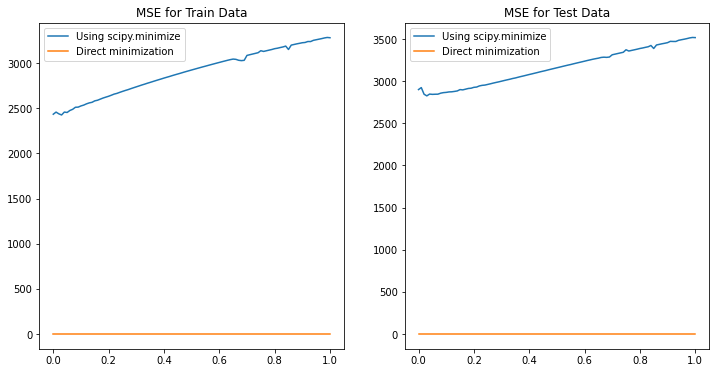

In [15]:

def regressionObjVal(w, X, y, lambd):

    # compute squared error (scalar) and gradient of squared error with respect
    # to w (vector) for the given data X and y and the regularization parameter
    # lambda

    # IMPLEMENT THIS METHOD
    """Solution Start"""

    # Derive from Page 6 of the Handout

    #Formula to implement
    # J(w) =  (1/2)(Summation(i:1,N)(Yi - transpose(w)*(Xi))^2) + (1/2)λ(w*transpose(w));

    N = X.shape[0]

    error = 0

    # (Yi - transpose(w)*(Xi))
    y_Subtract_weight_Xtest = np.subtract(y.T, np.dot(w.T, X.T))

    # (Yi - transpose(w)*(Xi))^2)
    square_Y_Subtract_weight_Xtest = np.multiply(y_Subtract_weight_Xtest, y_Subtract_weight_Xtest)

    # (Summation(i:1,N)(Yi - transpose(w)*(Xi))^2)
    summation_Square_Y_Subtract_weight_Xtest = np.sum(square_Y_Subtract_weight_Xtest)

    # (w*transpose(w))
    prod_TransposeW_W = np.dot(w.T, w)

    # λ(w*transpose(w))
    prod_lamda_prod_TransposeW_W = np.multiply(lambd, prod_TransposeW_W)

    #(1/2)(Summation(i:1,N)(Yi - transpose(w)*(Xi))^2) + (1/2)λ(w*transpose(w));
    error = (summation_Square_Y_Subtract_weight_Xtest / 2) + (prod_lamda_prod_TransposeW_W / 2)


    #Formula to implement
    # gradient = transpose(X)(Xw−y) + λw
    #          = transpose(X)Xw - transpose(X)y + λw

    # λw
    prod_Lambda_W = np.multiply(lambd, w)

    # transpose(X)y
    prod_TansposeY_X = np.dot(y.T, X)

    # transpose(X)X
    prod_TransposeX_X = np.dot(X.T, X)

    # transpose(X)Xw
    prod_TransposeW_prod_TransposeX_X =  np.dot(w.T, prod_TransposeX_X)

    # λw - transpose(X)y
    subtract_Prod_Lambda_W_prod_TansposeY_X = np.subtract(prod_Lambda_W, prod_TansposeY_X)

    # transpose(X)Xw - transpose(X)y + λw
    error_grad = np.add(subtract_Prod_Lambda_W_prod_TansposeY_X, prod_TransposeW_prod_TransposeX_X)


    error = error.flatten()
    error_grad = error_grad.flatten()
    print(error)
    print(error_grad)

    """Solution Ends"""
    return error, error_grad





# Problem 4
k = 101
lambdas = np.linspace(0, 1, num=k)
i = 0
mses3_train = np.zeros((k,1))
mses3 = np.zeros((k,1))
mses4_train = np.zeros((k,1))
mses4 = np.zeros((k,1))
opts = {'maxiter' : 20}    # Preferred value.
w_init = np.ones((X_i.shape[1],1))
for lambd in lambdas:
    args = (X_i, y, lambd)
    w_l = minimize(regressionObjVal, w_init, jac=True, args=args,method='CG', options=opts)
    w_l = np.transpose(np.array(w_l.x))
    w_l = np.reshape(w_l,[len(w_l),1])
    mses4_train[i] = testOLERegression(w_l,X_i,y)
    mses4[i] = testOLERegression(w_l,Xtest_i,ytest)
    i = i + 1
fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(lambdas,mses4_train)
plt.plot(lambdas,mses3_train)
plt.title('MSE for Train Data')
plt.legend(['Using scipy.minimize','Direct minimization'])

plt.subplot(1, 2, 2)
plt.plot(lambdas,mses4)
plt.plot(lambdas,mses3)
plt.title('MSE for Test Data')
plt.legend(['Using scipy.minimize','Direct minimization'])
plt.show()